In [110]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Excel Data を読み込んでみよう

In [111]:
data = pd.read_excel('data/1-2-2020.xlsx')  # Excel file は、read_excel()関数で読み込み可能
data.head()  # 先頭５行を表示

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,NaN,地熱,NaN,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計
3,北海道,98,2032077.6,32,6176880,1,2070000,56,428134,127,675751.1,1,25000,3,96650,3,49920,184,1128885.1,0,0,315,11407842.7
4,青森県,19,128750,10,655750,1,1100000,24,593870,35,399997,0,0,4,134850,1,18800,59,993867,0,0,89,2878367


- Unnamed のような列や上部の Record に NaN が多く散見される。
- ０～２行までの Data が列名を表し、３行目から実際の Data となっている様子。

In [112]:
data.tail()  # 末尾５行を表示

,１－（２）．都道府県別発電所数、出力数 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,２０２０年 ８月３日公表時点,Unnamed: 21,（単位：kW）
49,沖縄県,0,0,26,2470080,0,0,13,18130,1,12000,0,0,0,0,0,0,14,30130,0,0,40,2500210
50,合 計,1748,49638035.6,461,169249967,15,33083000,315,3647239.2,2562,10755126.4,16,462689.6,78,2483852,61,971126,2893,14865055.2,2,42910,5119,266878967.8
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,１ バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,２ 一つの発電所内に複数の発電機が存在し、電源種別が異なる場合には、発電所数は最大出力が最大...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 沖縄県までは問題ないが、合計行や備考行が含まれてしまっている。

沖縄県までの Data があれば合計値は計算可能なので、削除する方針をとる。

- 先頭は、実際に Data が始まる４行目から Data 取得。
- 列名はないもの。
- 末尾は、合計から下の Data を削除

として Data を再取得する

In [113]:
data = pd.read_excel('data/1-2-2020.xlsx', skiprows=4, header=None)  # skiprows=4 でData の取得開始行を４行目からに指定。header=None で列名なし、に設定。
data.head()  # 先頭５行を表示

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


In [114]:
data.drop(data.tail(4).index, inplace=True)  # .drop() に data.tail(4).index で取得した末尾４行の index を渡し、inplace=True で破壊的に削除。
data.tail()  # 末尾５行を表示

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
42,熊本県,49,803395.0,5.0,1562280.0,0.0,0.0,2.0,26000.0,81.0,232540.0,0.0,0.0,1.0,76780.0,2.0,10500.0,83.0,258540.0,0.0,0.0,137.0,2624215.0
43,大分県,38,300520.0,9.0,4111600.0,0.0,0.0,1.0,11000.0,53.0,392595.0,6.0,155099.6,4.0,118200.0,0.0,0.0,60.0,558694.6,0.0,0.0,107.0,4970814.6
44,宮崎県,48,2158730.0,4.0,204940.0,0.0,0.0,1.0,16000.0,35.0,248774.5,0.0,0.0,3.0,76700.0,0.0,0.0,36.0,264774.5,0.0,0.0,88.0,2628444.5
45,鹿児島県,35,195808.0,30.0,1307600.0,1.0,1780000.0,18.0,225470.0,143.0,591693.0,3.0,60790.0,2.0,72700.0,0.0,0.0,164.0,877953.0,0.0,0.0,230.0,4161361.0
46,沖縄県,0,0.0,26.0,2470080.0,0.0,0.0,13.0,18130.0,1.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,30130.0,0.0,0.0,40.0,2500210.0


- 今回は Data を確認せずに読み込みを実施したが、実際には大容量File でない限りは、一度中身を確認してから加工を行なう。
- pandas はあくまで表形式の Data を前提に読み込みを行なうため、表形式までの加工が必要になる。

## Column を抽出して付与してみよう
Data を扱いやすくするために、Column名の抽出・整形を行ない、Data に付与していく。

In [115]:
col_data = pd.read_excel('data/1-2-2020.xlsx', skiprows=1, header=None)  # sikprows=1 で１行目を飛ばして２行目から取得。header=None で列名は取得しないよう設定。
col_data = col_data.head(3)  # 先頭３行のみ自己代入
col_data  # Data を表示

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風力,NaN,太陽光,NaN,地熱,NaN,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,NaN,NaN,NaN,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


NaN の部分は、Cell結合の影響だとわかる
- 行方向の影響: 新エネルギー等発電所は、詳細の発電種類として風力や太陽光などがあるのに対して水力、火力発電所等は結合されている
- 列方向の影響: 水力発電所に対して、発電所数、最大出力計が本来であれば２つあるが、Cell結合によって、最大出力計の部分が欠損している

まず行方向の処理を行なう。

加工指針:
1. １行目の欠損値に０行目の値を入れる。
2. 1 実施後に１行目に関しては「発電所」という文字列を除外しておく

In [116]:
col_data.iloc[1, 1:].fillna(col_data.iloc[0, 1:], inplace=True)  # １行目の１列以降の欠損値へ０行目１列目以降の Data を代入
col_data.iloc[1, 1:] = col_data.iloc[1, 1:].str.replace('発電所', '')  # １行目１列目以降の Data から「発電所」という文字列を除去
col_data  # Data を表示

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,NaN,火力発電所,NaN,原子力発電所,NaN,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,その他,NaN,合計,NaN
1,NaN,水力,NaN,火力,NaN,原子力,NaN,風力,NaN,太陽光,NaN,地熱,NaN,〔バイオマス〕,NaN,〔廃棄物〕,NaN,計,NaN,その他,NaN,合計,NaN
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [117]:
for i in col_data.columns:
    if i < col_data.columns.max():  # 最終行で Error が起こさない対策
        col_data[i + 1].fillna(col_data[i], inplace=True)  # 自身の列に対して、右隣の列が欠損していたら、自身の列を代入する
col_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,太陽光,地熱,地熱,〔バイオマス〕,〔バイオマス〕,〔廃棄物〕,〔廃棄物〕,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [118]:
col_data.replace('〔バイオマス〕', 'バイオマス', inplace=True)  # 〔〕を削除
col_data.replace('〔廃棄物〕', '廃棄物', inplace=True)  # 〔〕を削除
col_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,都道府県,水力発電所,水力発電所,火力発電所,火力発電所,原子力発電所,原子力発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,新エネルギー等発電所,その他,その他,合計,合計
1,NaN,水力,水力,火力,火力,原子力,原子力,風力,風力,太陽光,太陽光,地熱,地熱,バイオマス,バイオマス,廃棄物,廃棄物,計,計,その他,その他,合計,合計
2,NaN,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計,発電所数,最大出力計


In [119]:
tg_col = '_'.join(list(col_data[0].dropna()))  # 該当の列を指定して Data を取得し、欠損値を除去した上で List型に変換。
print(tg_col)
tg_col = '_'.join(list(col_data[1].dropna()))  # 該当の列を指定して Data を取得し、欠損値を除去した上で List型に変換。
print(tg_col)

都道府県
水力発電所_水力_発電所数


In [120]:
# 全列に対しての Column名整形
cols = []
for i in col_data.columns:
    tg_col = '_'.join(list(col_data[i].dropna()))
    cols.append(tg_col)
cols

['都道府県',
 '水力発電所_水力_発電所数',
 '水力発電所_水力_最大出力計',
 '火力発電所_火力_発電所数',
 '火力発電所_火力_最大出力計',
 '原子力発電所_原子力_発電所数',
 '原子力発電所_原子力_最大出力計',
 '新エネルギー等発電所_風力_発電所数',
 '新エネルギー等発電所_風力_最大出力計',
 '新エネルギー等発電所_太陽光_発電所数',
 '新エネルギー等発電所_太陽光_最大出力計',
 '新エネルギー等発電所_地熱_発電所数',
 '新エネルギー等発電所_地熱_最大出力計',
 '新エネルギー等発電所_バイオマス_発電所数',
 '新エネルギー等発電所_バイオマス_最大出力計',
 '新エネルギー等発電所_廃棄物_発電所数',
 '新エネルギー等発電所_廃棄物_最大出力計',
 '新エネルギー等発電所_計_発電所数',
 '新エネルギー等発電所_計_最大出力計',
 'その他_その他_発電所数',
 'その他_その他_最大出力計',
 '合計_合計_発電所数',
 '合計_合計_最大出力計']

In [121]:
data.columns = cols  # 作成した Column を Data に代入
data.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


- 特に Sheet名を指定しない場合、１番左の Sheet を読み込む仕様になっている
- 一般的には、Sheet をいろいろ作成して利用するのが Excel の利点の為、Sheet が１つしかない場合は少ない

## 全Sheet の Data を読み込んでみよう

In [122]:
xl = pd.ExcelFile('data/1-2-2020.xlsx')  # pd.ExcelFile を利用すると Excel内のすべての情報が取得できる
sheets = xl.sheet_names  # sheet_names property で Sheet 名を List で取得
sheets

['2020.4',
 '2020.5',
 '2020.6',
 '2020.7',
 '2020.8',
 '2020.9',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.1']

2020年４月から2021年１月までの10sheet であることを確認。

In [123]:
# とりあえず、１sheet のみ読み込んでみる
data = xl.parse(sheets[0], skiprows=4, header=None)  # .parse() 関数で Excel data の取得が可能。 skiprows=4 で先頭４行を skip し header=None で Column名はないものとして読み込む
data.drop(data.tail(4).index, inplace=True)  # 末尾４行を除去
data.columns = cols  # Column名を前に準備していたもので代入
data.head()  # 先頭５行表示

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2


In [124]:
# for文を用いて、全Sheet の Data を読み込む
datas = []  # 空List を準備
for sheet in sheets:
    data = xl.parse(sheets[0], skiprows=4, header=None)  # .parse()で Data を取得。skiprows=4: 先頭４行を skip, header=None: Column名指定
    data.drop(data.tail(4).index, inplace=True)  # 末尾４行を削除
    data.columns = cols  # 準備した Column名を代入
    data['年月'] = sheet  # Sheet名から年月Data を取得
    datas.append(data)  # 準備した List に格納

datas  # List の表示

[    都道府県 水力発電所_水力_発電所数  水力発電所_水力_最大出力計  火力発電所_火力_発電所数  火力発電所_火力_最大出力計  \
 0    北海道            98       2032077.6           32.0       6176880.0   
 1    青森県            19        128750.0           10.0        655750.0   
 2    岩手県            40        274661.0            3.0        238000.0   
 3    宮城県            22         63915.0           10.0       2211050.0   
 4    秋田県            42        287863.0            4.0       2497550.0   
 5    山形県            42        401814.0            3.0        750750.0   
 6    福島県            94       3973025.0           12.0      11626600.0   
 7    茨城県             6         13450.0           16.0       9985120.0   
 8    栃木県            33       2942130.0            3.0       1291200.0   
 9    群馬県            74       3126512.0            3.0         45350.0   
 10   埼玉県            13         68580.0            3.0        151200.0   
 11   千葉県             1           132.0           22.0      20049525.0   
 12   東京都             5         44750.

In [125]:
datas = pd.concat(datas, ignore_index=True)  # Data を DataFrame にする。
datas.head()  # 先頭５行表示

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,32.0,6176880.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,10.0,655750.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,3.0,238000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,10.0,2211050.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,4.0,2497550.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


- pd.concat() は縦にも横にも結合できる
- pd.concat() は結合したい Data を List で型で渡す必要がある。

## Data の値を計算で修正しよう
新エネルギー等発電所のバイオマス、廃棄物、火力発電所の欄に記載されている電力量のうち、バイオマス、廃棄物に係る量を再掲していると備考欄に記載あり。
=> 火力発電所の値から、バイオマス、廃棄物の値を減算する必要あり。
pandas で列ごとに四則演算を行ない

- 発電所数
- 最大出力数計

の２つに対して処理を行なう

In [126]:
# Data 値を修正する
datas['火力発電所_火力_発電所数'] = datas['火力発電所_火力_発電所数'] - datas['新エネルギー等発電所_バイオマス_発電所数'] - datas['新エネルギー等発電所_廃棄物_発電所数']
datas['火力発電所_火力_最大出力計'] = datas['火力発電所_火力_最大出力計'] - datas['新エネルギー等発電所_バイオマス_最大出力計'] - datas['新エネルギー等発電所_廃棄物_最大出力計']
datas.head()

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,新エネルギー等発電所_計_発電所数,新エネルギー等発電所_計_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,合計_合計_発電所数,合計_合計_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,184.0,1128885.1,0.0,0.0,315.0,11407842.7,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,59.0,993867.0,0.0,0.0,89.0,2878367.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,34.0,451113.4,0.0,0.0,77.0,963774.4,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,76.0,454812.0,0.0,0.0,109.0,4379777.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,51.0,627939.2,0.0,0.0,97.0,3413352.2,2020.4


## 必要な Column だけに絞りこもう
- 可視化にに適した形として、縦持ちData を整形していく
- 縦持ちData は人間にとっては見にくい Data だが可視化の際には、Data の抽出がしやすい
- 縦持ち化に向けて、必要Column に絞り込んでいく
  - 合計を二次元表形式で残しておくのは、人間にとっては非常にわかりやすいが Program で合計を出力する際には、誤って元の値と加算してしまったりしやすい


In [127]:
# 合計列の除外
datas.drop(['合計_合計_発電所数', '合計_合計_最大出力計', '新エネルギー等発電所_計_発電所数', '新エネルギー等発電所_計_最大出力計'], axis=1, inplace=True)  # .drop() に List で Column名を複数指定することで一度の処理で複数列を削除。axis=1 で列方向の削除。inplace=True で破壊的処理を指定
datas.head()  # 先頭５行を表示

,都道府県,水力発電所_水力_発電所数,水力発電所_水力_最大出力計,火力発電所_火力_発電所数,火力発電所_火力_最大出力計,原子力発電所_原子力_発電所数,原子力発電所_原子力_最大出力計,新エネルギー等発電所_風力_発電所数,新エネルギー等発電所_風力_最大出力計,新エネルギー等発電所_太陽光_発電所数,新エネルギー等発電所_太陽光_最大出力計,新エネルギー等発電所_地熱_発電所数,新エネルギー等発電所_地熱_最大出力計,新エネルギー等発電所_バイオマス_発電所数,新エネルギー等発電所_バイオマス_最大出力計,新エネルギー等発電所_廃棄物_発電所数,新エネルギー等発電所_廃棄物_最大出力計,その他_その他_発電所数,その他_その他_最大出力計,年月
0,北海道,98,2032077.6,26.0,6030310.0,1.0,2070000.0,56.0,428134.0,127.0,675751.1,1.0,25000.0,3.0,96650.0,3.0,49920.0,0.0,0.0,2020.4
1,青森県,19,128750.0,5.0,502100.0,1.0,1100000.0,24.0,593870.0,35.0,399997.0,0.0,0.0,4.0,134850.0,1.0,18800.0,0.0,0.0,2020.4
2,岩手県,40,274661.0,1.0,149000.0,0.0,0.0,5.0,109180.0,27.0,238433.4,2.0,103500.0,2.0,89000.0,0.0,0.0,0.0,0.0,2020.4
3,宮城県,22,63915.0,6.0,2162300.0,1.0,1650000.0,1.0,20400.0,75.0,434412.0,0.0,0.0,0.0,12900.0,4.0,35850.0,0.0,0.0,2020.4
4,秋田県,42,287863.0,3.0,2462050.0,0.0,0.0,24.0,422518.6,24.0,117121.0,3.0,88300.0,1.0,20500.0,0.0,15000.0,0.0,0.0,2020.4


## 縦持ちData を作成しよう

In [128]:
# 縦持ちData の作成
datas_v = pd.melt(datas, id_vars=['都道府県', '年月'], var_name='変数名', value_name='値')  # .melt()関数で縦持ちを行なう。第１引数で対象Data を指定。id_vars= 引数で Key となる列を指定。var_name=, value_name= 引数で Column名を指定
datas_v.head()  # 先頭５行表示

,都道府県,年月,変数名,値
0,北海道,2020.4,水力発電所_水力_発電所数,98
1,青森県,2020.4,水力発電所_水力_発電所数,19
2,岩手県,2020.4,水力発電所_水力_発電所数,40
3,宮城県,2020.4,水力発電所_水力_発電所数,22
4,秋田県,2020.4,水力発電所_水力_発電所数,42


## 縦持ちData を整形しよう
現在の変数名を
- 発電所種別
- 発電種別
- 項目

に後々便利なので別の列に分割しておく

In [129]:
# 変数名の分割
var_data = datas_v['変数名'].str.split('_', expand=True)  # str.split を用いることで、特定の文字列に対して区切ることができる。extend=True を指定することで列ごとに区切ってくれる
var_data.head()

,0,1,2
0,水力発電所,水力,発電所数
1,水力発電所,水力,発電所数
2,水力発電所,水力,発電所数
3,水力発電所,水力,発電所数
4,水力発電所,水力,発電所数


In [130]:
# 分割した変数名の結合
var_data.columns = ['発電所種別', '発電種別', '項目']  # Column名を代入
datas_v = pd.concat([datas_v, var_data], axis=1)  # concat()に axis=1 を指定して Data を縦に結合　※ index を Key に結合するので index が異なる場合は意図しない結合になるので注意
datas_v.drop(['変数名'], axis=1, inplace=True)
datas_v.head()

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


変数名ではなく、発電種別等で絞り込みがしやすくなった

## 発電実績Data を加工しよう
最大出力や発電所数に、発電実績Data が加わることで分析や可視化の幅を広げる。

Data を読み込んでみて、加工の方針を立てていく

In [131]:
capacity_data = pd.read_excel('data/2-2-2020.xlsx')
display(capacity_data.head())
display(capacity_data.tail())

,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
0,都道府県,水力発電所,火力発電所,原子力発電所,新エネルギー等発電所,NaN,NaN,NaN,NaN,NaN,その他,合計
1,NaN,NaN,NaN,NaN,風力,太陽光,地熱,〔バイオマス〕,〔廃棄物〕,計,NaN,NaN
2,NaN,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量,電力量
3,北海道,408779.3,1838320.47,0.0,86901.404,104709.672,10354.0,100682.0,32870.0,201965.076,0.0,2449064.846
4,青森県,50945.0,189372.0,0.0,130363.28,52596.6659,0.0,73726.0,6823.0,182959.9459,0.0,423276.9459


,２－（２）．都道府県別発電実績 （２０２０年４月）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,２０２０年８月３日公表時点,Unnamed: 10,"（単位：1,000kWh）"
48,鹿児島県,34701.0,70601.0,654763.0,26101.985,74286.66,25633.0,30089.0,0.0,126021.645,0.0,886086.645
49,沖縄県,0.0,478257.0,0.0,2653.0,1215.0,0.0,1758.0,0.0,3868.0,0.0,482125.0
50,合 計,8296665.947,46596894.9142,4631681.89,709349.955,1596008.836673,159402.0,1428699.17284,316874.30255,2464760.791673,17256.0,62007262.965873
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,備考,バイオマスまたは廃棄物の欄には、専ら又は主として使用する燃料がバイオマス又は廃棄物の場合には...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 汎用的に使用できる加工として、47都道府県であることに着目し、上から47行目の Data を取得していく。
  ※ Data の特性を考え、より汎用的に利用できるように Program を改善していくのは非常に重要である。
- Column名を取得しておく

In [132]:
# 発電実績Data の Column 抽出
col_ca_data = pd.read_excel('data/2-2-2020.xlsx', skiprows=1, header=None)  # 先頭１行目を skip し、列名なしで Data を読み込み
col_ca_data = col_ca_data.head(3)  # Data の先頭３行を抽出

col_ca_data.iloc[1, 1:].fillna(col_ca_data.iloc[0, 1:], inplace=True)  # ２行目の欠損値部分に１行目の値を破壊的処理で代入
col_ca_data.iloc[1, 1:] = col_ca_data.iloc[1, 1:].str.replace('発電所', '')  # ２行目の Data で「発電所」という文字列を削除

for i in col_ca_data.columns:
    if i < col_ca_data.columns.max():
        col_ca_data[i + 1].fillna(col_ca_data[i], inplace=True)  # 右隣の Cell が欠損していたら自身値を破壊的処理で代入
col_ca_data.replace('〔バイオマス〕', 'バイオマス', inplace=True)  # 〔〕を削除
col_ca_data.replace('〔廃棄物〕', '廃棄物', inplace=True)  # 〔〕を削除

cols_ca = []
for i in col_ca_data.columns:
    tg_col  = '_'.join(list(col_ca_data[i].dropna()))  # 該当の列を指定して Data を取得し、欠損値を除去した上で List型に変換
    cols_ca.append(tg_col)  # 準備した col_ca に値を追加していく
cols_ca

['都道府県',
 '水力発電所_水力_電力量',
 '火力発電所_火力_電力量',
 '原子力発電所_原子力_電力量',
 '新エネルギー等発電所_風力_電力量',
 '新エネルギー等発電所_太陽光_電力量',
 '新エネルギー等発電所_地熱_電力量',
 '新エネルギー等発電所_バイオマス_電力量',
 '新エネルギー等発電所_廃棄物_電力量',
 '新エネルギー等発電所_計_電力量',
 'その他_その他_電力量',
 '合計_合計_電力量']

In [133]:
# 発電実績Data の全Sheet 結合
xl_ca = pd.ExcelFile('data/2-2-2020.xlsx')
sheets = xl_ca.sheet_names  # Excel の 全Sheet の名前を List に格納
ca_datas = []
for sheet in sheets:
    capacity_data = xl_ca.parse(sheet, skiprows=4, header=None)  # sheet の Data を先頭４行を skip し、列名なしで取得
    capacity_data = capacity_data.head(47)  # 先頭47行の Data を抽出
    capacity_data.columns = cols_ca  # Column名を代入
    capacity_data['年月'] = sheet  # 「年月」列を作成し sheet名を代入
    ca_datas.append(capacity_data)  # 準備していた ca_datas に格納していく
ca_datas = pd.concat(ca_datas, ignore_index=True)  # ca_datas を結合し index を振り直し
ca_datas.head()  # 先頭５行を表示

,都道府県,水力発電所_水力_電力量,火力発電所_火力_電力量,原子力発電所_原子力_電力量,新エネルギー等発電所_風力_電力量,新エネルギー等発電所_太陽光_電力量,新エネルギー等発電所_地熱_電力量,新エネルギー等発電所_バイオマス_電力量,新エネルギー等発電所_廃棄物_電力量,新エネルギー等発電所_計_電力量,その他_その他_電力量,合計_合計_電力量,年月
0,北海道,408779.3,1838320.47,0.0,86901.404,104709.6720,10354.0,100682.00,32870.0,201965.0760,0.0,2.449065e+06,2020.4
1,青森県,50945.0,189372.00,0.0,130363.280,52596.6659,0.0,73726.00,6823.0,182959.9459,0.0,4.232769e+05,2020.4
2,岩手県,144505.0,56981.05,0.0,31640.883,31047.0000,21889.0,56371.05,0.0,84576.8830,0.0,2.860629e+05,2020.4
3,宮城県,33697.0,943982.00,0.0,5176.000,68463.1100,0.0,72447.00,25211.0,73639.1100,0.0,1.051318e+06,2020.4
4,秋田県,122188.0,1135707.37,0.0,109050.502,14774.3000,42218.0,13966.37,7599.0,166042.8020,0.0,1.423938e+06,2020.4


In [134]:
# 発電実績Data の縦持ちData 作成
ca_datas['火力発電所_火力_電力量'] = ca_datas['火力発電所_火力_電力量'] - ca_datas['新エネルギー等発電所_バイオマス_電力量'] - ca_datas['新エネルギー等発電所_廃棄物_電力量']  # 火力発電所の電力量にバイオマスと廃棄物の値も含まれているため減算
ca_datas.drop(['合計_合計_電力量', '新エネルギー等発電所_計_電力量'], axis=1, inplace=True)  # 合計列を破壊的処理で削除
ca_datas_v = pd.melt(ca_datas, id_vars=['都道府県', '年月'], var_name='変数名', value_name='値')  # .melt()で都道府県と年月を Key に縦持ちData を作成
var_data = ca_datas_v['変数名'].str.split('_', expand=True)  # 変数名の値を「_」で分割
var_data.columns = ['発電所種別', '発電種別', '項目']  # 変数名を分割した Data に列名を代入
ca_datas_v = pd.concat([ca_datas_v, var_data], axis=1)  # 縦持ちData を変数名を分割したData を縦結合
ca_datas_v.drop(['変数名'], axis=1, inplace=True)  # 変数名列は不要なので削除
ca_datas_v.head()  # 先頭５行表示

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,408779.3,水力発電所,水力,電力量
1,青森県,2020.4,50945.0,水力発電所,水力,電力量
2,岩手県,2020.4,144505.0,水力発電所,水力,電力量
3,宮城県,2020.4,33697.0,水力発電所,水力,電力量
4,秋田県,2020.4,122188.0,水力発電所,水力,電力量


## 可視化用Data を仕上げよう

In [135]:
# 可視化用Data の作成
datas_v_all = pd.concat([datas_v, ca_datas_v], ignore_index=True)  # 最大出力計&発電所数Data と発電実績Data を結合
display(datas_v_all.head())  # 先頭５行を表示
display(datas_v_all.tail())  # 末尾５行を表示

,都道府県,年月,値,発電所種別,発電種別,項目
0,北海道,2020.4,98,水力発電所,水力,発電所数
1,青森県,2020.4,19,水力発電所,水力,発電所数
2,岩手県,2020.4,40,水力発電所,水力,発電所数
3,宮城県,2020.4,22,水力発電所,水力,発電所数
4,秋田県,2020.4,42,水力発電所,水力,発電所数


,都道府県,年月,値,発電所種別,発電種別,項目
12685,熊本県,2021.1,0.0,その他,その他,電力量
12686,大分県,2021.1,0.0,その他,その他,電力量
12687,宮崎県,2021.1,0.0,その他,その他,電力量
12688,鹿児島県,2021.1,0.0,その他,その他,電力量
12689,沖縄県,2021.1,0.0,その他,その他,電力量


末尾で「電力量」の項目が確認とれることから結合がちゃんと出来ていると判断できる

In [136]:
# 2020年４月の発電所種別Data の表示
pd.pivot_table(datas_v_all.loc[datas_v_all['年月']=='2020.4'], index='発電所種別', columns='項目', values='値', aggfunc='sum')

項目,最大出力計,発電所数,電力量
発電所種別,,,
その他,4.291000e+04,2.0,1.725600e+04
原子力発電所,3.308300e+07,15.0,4.631682e+06
新エネルギー等発電所,1.832003e+07,3032.0,4.210335e+06
水力発電所,4.963804e+07,1748.0,8.296664e+06
火力発電所,1.657950e+08,322.0,4.485132e+07


.pivot_table() は、行、列にしたい Column名、集計した数字と集計方法を指定することで簡単に表を作成できる。

## Data の分布を Histogram で可視化してみよう

<AxesSubplot:ylabel='Count'>

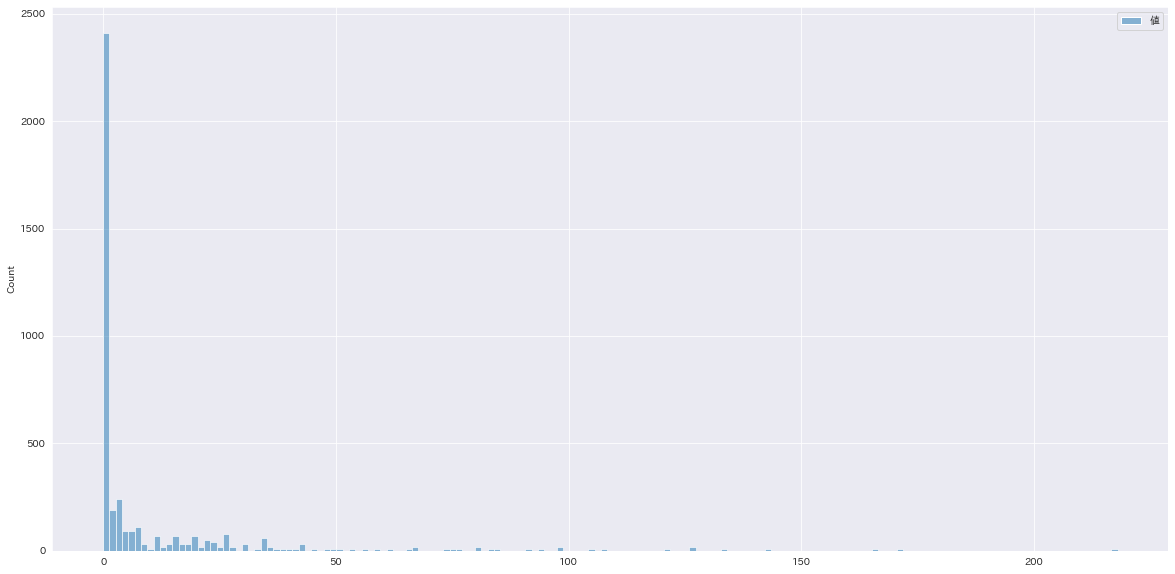

In [137]:
# 発電所の Histogram
plt.figure(figsize=(20, 10))  # Graph の Size を指定
sns.histplot(datas_v_all.loc[datas_v_all['項目']=='発電所数'])  # 発電所数の Histogram を描画

x軸: 発電所数の範囲
y軸: Data 件数

- ０付近が最も Data件数が多く、裾を引いている分布になっている。
- 200を超える Data もあるが大半は10以下になる

## Data の分布を箱ひげ図で可視化してみよう
先ほどの分布だと、中央値がどのあたりにあるのか等が一目でわからない。
そこで、箱ひげ図で可視化を行なってみる

<AxesSubplot:ylabel='値'>

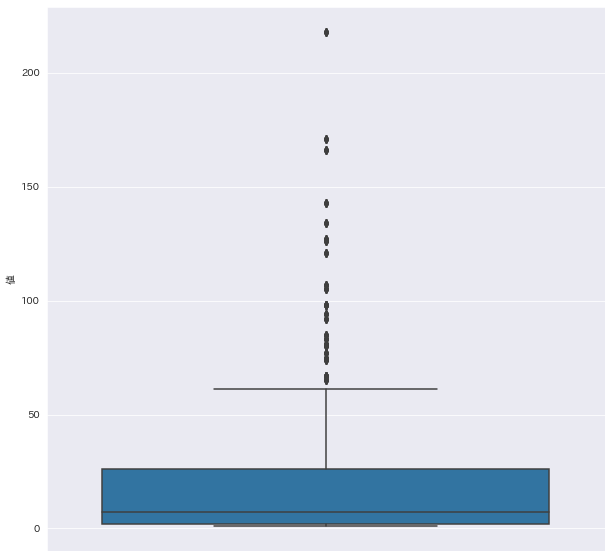

In [138]:
# 発電所の箱ひげ図
plt.figure(figsize=(10, 10))
viz_data = datas_v_all.loc[(datas_v_all['項目'] == '発電所数')&(datas_v_all['値']!=0)]
sns.boxplot(y=viz_data['値'])

<AxesSubplot:xlabel='発電種別', ylabel='値'>

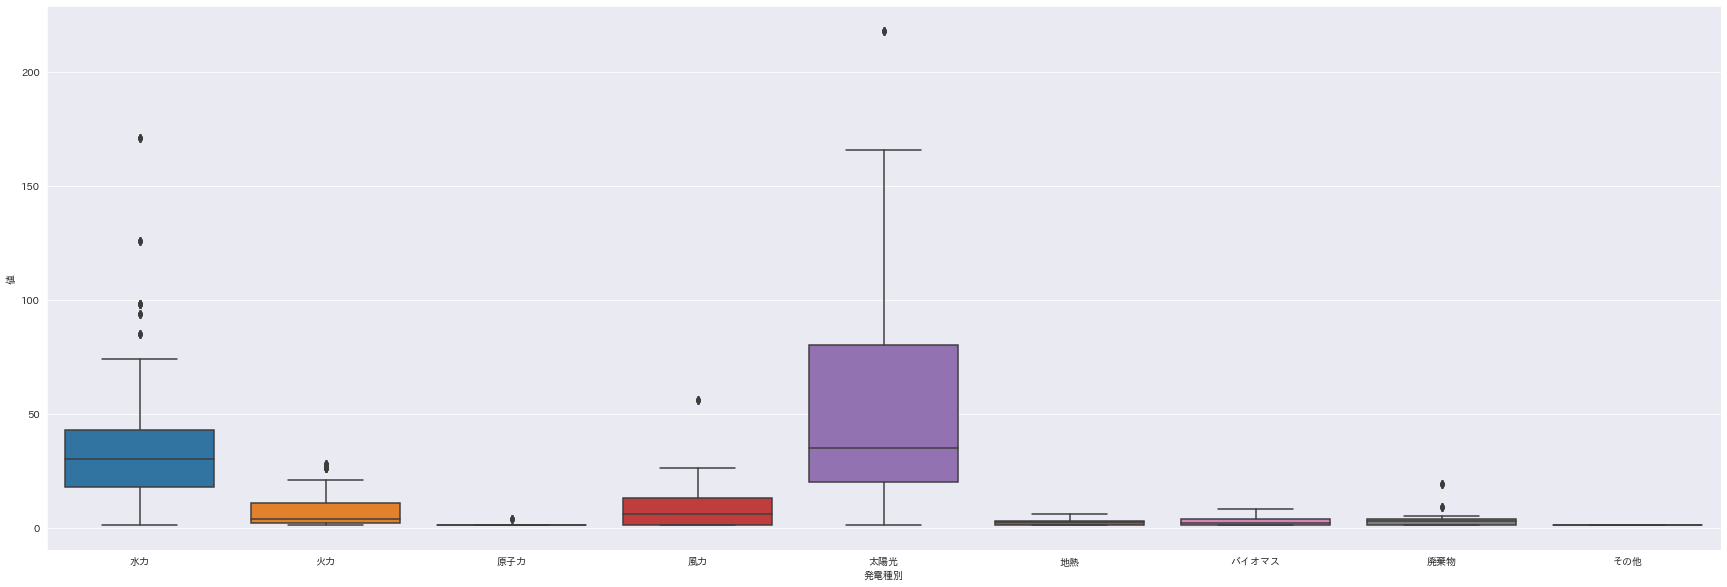

In [139]:
# 発電所の箱ひげ図（発電所別）
plt.figure(figsize=(30, 10))
sns.boxplot(x=viz_data['発電種別'], y=viz_data['値'])

- 全体的に発電所数が多いと考えられるのは水力、太陽光となっている。
- どちらも中央値の値は同じくらいだが、箱の大きさは太陽光の方が広く見えることから、太陽光は分布が比較的均一に分散していると思われる。

## 最近の発電量を可視化してみよう
Data の分布ではなく特徴をつかむための可視化を開始する。
- 最近の Data だけに絞り込んで、どの発電種別や発電所の電力量が多いかを見ていく。
- 上記を一目で把握する為に棒Graph で可視化する
- 2021年１月の電力Data に絞り込み、発電種別ごとに電力量の集計を行なう。

In [140]:
# 電力量の集計

# 項目、年月を指定の条件で絞り込み、今回使用する発電種別と値のみ Column 抽出。電力量で絞り込んでいるので値は全て電力量になる
viz_data = datas_v_all[['発電種別', '値']].loc[(datas_v_all['項目']=='電力量')&(datas_v_all['年月']=='2021.1')]
viz_data = viz_data.groupby('発電種別', as_index=False).sum()  # 発電種別毎に集計
viz_data

,発電種別,値
0,その他,1.382000e+04
1,バイオマス,1.743504e+06
2,原子力,2.582599e+06
3,地熱,1.881800e+05
4,太陽光,1.777285e+06
5,廃棄物,3.159551e+05
6,水力,5.183845e+06
7,火力,7.456928e+07
8,風力,9.067438e+05


火力が非常に高いことを確認。差をわかりやすくする為、棒Graph で可視化する。

<AxesSubplot:xlabel='発電種別', ylabel='値'>

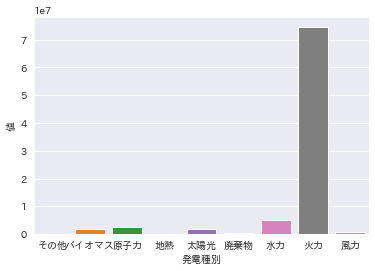

In [141]:
sns.barplot(x=viz_data['発電種別'], y=viz_data['値'])

一目瞭然で火力発電に依存していることを確認。

## 先月の発電量とあわせて可視化してみよう
発電種別ごとの電力量の全体像がわかったところで、さらに情報を追加して見ていく。
時系列の要素として、先月と今月ではどのくらい差がでているのかを棒Graph を２つ並べて比較する。

In [142]:
# 年月、発電種別ごとの電力量
viz_data = datas_v_all[['発電種別', '年月', '値']].loc[(datas_v_all['項目']=='電力量')]  # 電力量のみを抽出
viz_data = viz_data.groupby(['発電種別', '年月'], as_index=False).sum()  # 発電種別、年月ごとに集計
viz_data.head()

,発電種別,年月,値
0,その他,2020.10,21670.7
1,その他,2020.11,15571.3
2,その他,2020.12,15759.0
3,その他,2020.4,17256.0
4,その他,2020.5,16782.0


<AxesSubplot:xlabel='発電種別', ylabel='値'>

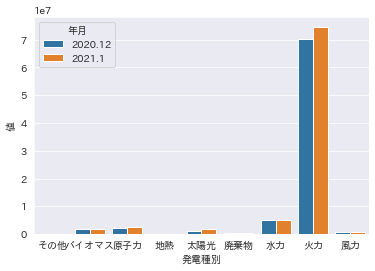

In [143]:
# 発電種別ごとの電力量の前月比較Graph
viz_data = viz_data.loc[(viz_data['年月']=='2020.12') | (viz_data['年月']=='2021.1')]  # 2021年１月と先月2020年12月の２ケ月のData だけに絞り込む
sns.barplot(x=viz_data['発電種別'], y=viz_data['値'], hue=viz_data['年月'])  # hue=　引数に年月を指定することで色をわけて描画

## 電力の時系列変化を可視化してみよう
2020年４月から2021年１月までの時系列変化を可視化してみる

<AxesSubplot:xlabel='年月', ylabel='値'>

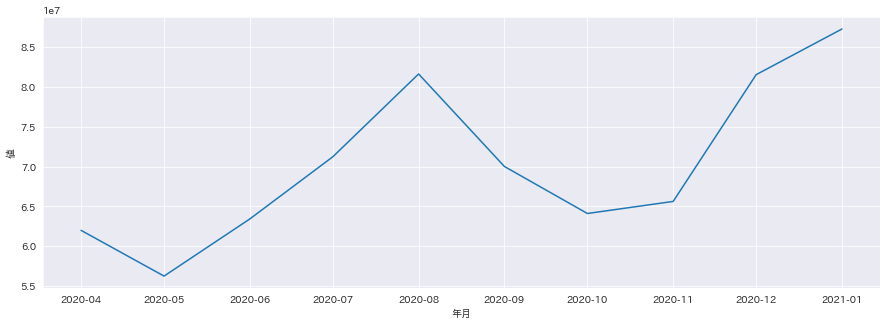

In [144]:
# 電力量の時系列変化
plt.figure(figsize=(15, 5))  # 横長のGraph になるので大きさを指定

# 電力量を年月ごとに集計
viz_data = datas_v_all[['発電種別', '年月', '値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby('年月', as_index=False).sum()

viz_data['年月'] = pd.to_datetime(viz_data['年月'])  # 年月を datetime型に変換

sns.lineplot(x=viz_data['年月'], y=viz_data['値'])  # 折れ線Graph で描画

７、８月のような真夏や、１月のような真冬に電力量が多くなっている。
=> クーラーや暖房を使用する影響と考えられ、感覚的に納得できる。

<AxesSubplot:xlabel='年月', ylabel='値'>

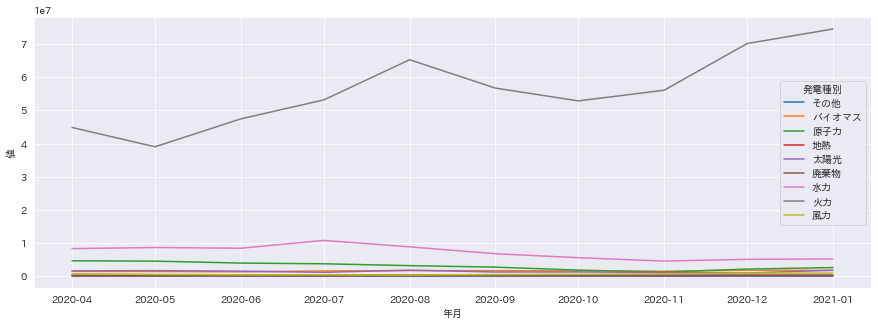

In [145]:
# 発電種別ごとの電力量の時系列変化

plt.figure(figsize=(15, 5))  # Graph size を指定

# 電力量を年月ごとに集計
viz_data = datas_v_all[['発電種別', '年月', '値']].loc[(datas_v_all['項目']=='電力量')]
viz_data = viz_data.groupby(['発電種別', '年月'], as_index=False).sum()

viz_data['年月'] = pd.to_datetime(viz_data['年月'])  # 年月を datetime型に変換

sns.lineplot(x=viz_data['年月'], y=viz_data['値'], hue=viz_data['発電種別'])  # hue= 引数に発電所を指定して、色別で折れ線Graph を描画

火力が圧倒的で、電力量全体の推移は、ほぼ火力の推移と一致。
※ 火力の割合が圧倒的に大きいため、他の種別の変化が埋もれている為、さらに細かい分析をする場合は火力を除外して可視化してみるとよい

## 電力の割合を可視化してみる
2021年１月の電力割合を確認していく

In [146]:
# 電力割合の計算

viz_data = datas_v_all.loc[(datas_v_all['項目']=='電力量') & (datas_v_all['年月']=='2021.1')]  # 2021年１月の Data を抽出
viz_data = viz_data[['発電種別', '値']].groupby('発電種別').sum()  # 発電種別と値（電力量）で集計
viz_data['割合'] = viz_data['値'] / viz_data['値'].sum()  # 書く発電種別の電力量を全体の電力量で除算し、割合を代入
viz_data  # Data を表示

,値,割合
発電種別,,
その他,1.382000e+04,0.000158
バイオマス,1.743504e+06,0.019976
原子力,2.582599e+06,0.029589
地熱,1.881800e+05,0.002156
太陽光,1.777285e+06,0.020363
廃棄物,3.159551e+05,0.003620
水力,5.183845e+06,0.059392
火力,7.456928e+07,0.854357
風力,9.067438e+05,0.010389


全体の85%を火力発電が締めていることを確認

積み上げ棒Graph で割合を可視化していく
※円Graph は Data分析の現場ではあま利用を推奨されていない。円Graph は中心に行くと小さく、外に向かうたびに大きくなっていくので錯覚を引き起こし、正確に割合を把握できない、と言われている。

<AxesSubplot:>

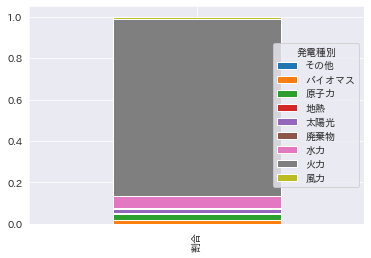

In [147]:
viz_data.T.loc[['割合']].plot(kind='bar', stacked=True)  # stacked=True を指定することで積み上げ棒Graph を描画

いかに火力の割合が大きいかが確認とれる。
次に水力だが、火力の足元にも及ばす火力一強であるといえる。

## 電力量の多い都道府県を比較してみよう
- 電力量上位２つに絞って見ていく。
- 使用量ではなく、あくまでも発電実績となるので注意する。

In [148]:
# 電力量の上位５都道府県

viz_data = datas_v_all.loc[datas_v_all['項目']=='電力量']  # 電力量のみに Data を絞り込み
viz_data = viz_data[['都道府県', '値']].groupby('都道府県', as_index=False).sum()  # 都道府県毎に集計し都道府県と値のみ抽出
viz_data.sort_values('値', inplace=True, ascending=False)  # 値（電力量）を降順（電力量が多い順）に並び替え
viz_data.head(5)

,都道府県,値
5,千葉県,6.846871e+07
32,神奈川県,6.587427e+07
24,愛知県,5.512558e+07
35,福島県,4.805125e+07
3,兵庫県,3.940553e+07


千葉県が最も電力の発電実績が多いことがわかる。

上位２県の千葉県、神奈川県に絞り込んで見ていく。折れ線Graph で時系列変化を比較してみる。

<AxesSubplot:xlabel='年月', ylabel='値'>

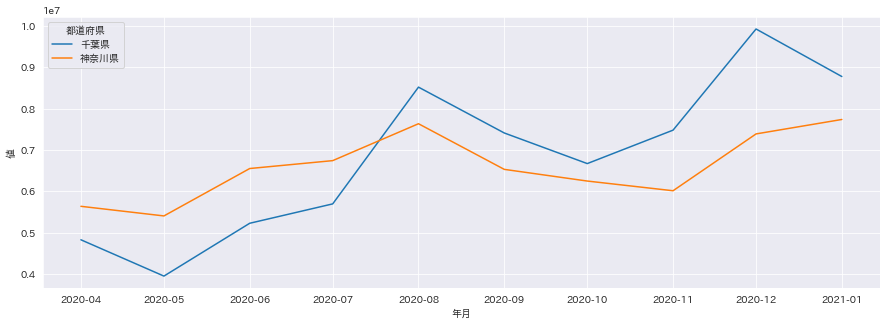

In [149]:
# 千葉県、神奈川県の電力量の時系列変化

plt.figure(figsize=(15, 5))  # Graph size を指定する
# 神奈川県、千葉県の電力量に Data を絞り込んで都道府県、年月、値のみ抽出
viz_data = datas_v_all[['都道府県', '年月', '値']].loc[(datas_v_all['項目']=='電力量') & ((datas_v_all['都道府県']=='神奈川県') | (datas_v_all['都道府県']=='千葉県'))]
viz_data = viz_data.groupby(['年月', '都道府県'], as_index=False).sum()  # 年月、都道府県毎に Data を集計
viz_data['年月'] = pd.to_datetime(viz_data['年月'])  # 年月Data を datetime型に変換
sns.lineplot(x=viz_data['年月'], y=viz_data['値'], hue=viz_data['都道府県'])  # 折れ線Graph で描画

- 概ね全体の時系列変化と同じで、夏と冬に電力量が多くなる
- ４月から７月は神奈川県の方が電力量が多い。
  => 仮説: ８月以降に発電所の数が千葉県で増加。もしくは、神奈川県の発電所の数が大きく減った可能性がある。

発電所数を Data に付加し、Bubble chart で可視化していく。
※ Bubble chart: 折れ線Graph の情報に、円の大きさという情報を付加したもの

In [150]:
# 発電所数情報の付加

viz_data_num = datas_v_all[['都道府県', '年月', '値']].loc[(datas_v_all['項目']=='発電所数') & ((datas_v_all['都道府県']=='神奈川県') | (datas_v_all['都道府県']=='千葉県'))]
viz_data_num  # 神奈川県と千葉県の発電所数に Data を絞りこみ「都道府県」「年月」「値」のみ抽出
viz_data_num = viz_data_num.groupby(['年月', '都道府県'], as_index=False).sum()  # 年月、都道府県で集計
viz_data_num['年月'] = pd.to_datetime(viz_data_num['年月'])  # 年月Data を datetime型に変化
viz_data.rename(columns={'値': '電力量'}, inplace=True)  # 代名詞を名詞に改名
viz_data_num.rename(columns={'値': '発電所数'}, inplace=True)  # 代名詞を名詞に改名
viz_data_join = pd.merge(viz_data, viz_data_num, on=['年月', '都道府県'], how='left')  # 年月、都道府県を key に横結合
viz_data_join.head()

,年月,都道府県,電力量,発電所数
0,2020-10-01,千葉県,6.669303e+06,201.0
1,2020-10-01,神奈川県,6.247037e+06,91.0
2,2020-11-01,千葉県,7.477717e+06,201.0
3,2020-11-01,神奈川県,6.012612e+06,91.0
4,2020-12-01,千葉県,9.923473e+06,201.0


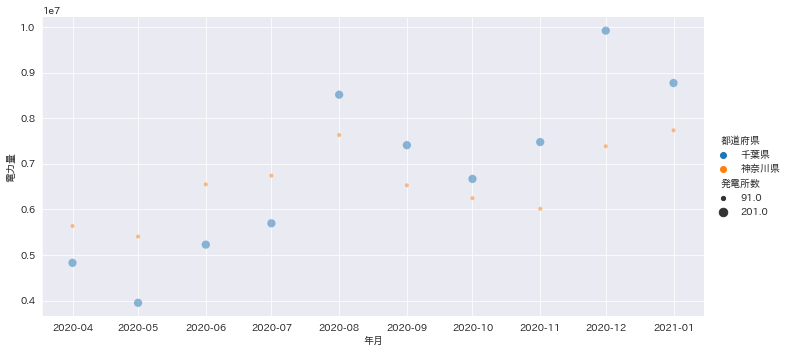

In [151]:
sns.relplot(x=viz_data_join['年月'], y=viz_data_join['電力量'], hue=viz_data_join['都道府県'], size=viz_data_join['発電所数'], alpha=0.5, height=5, aspect=2)

- 青円である千葉の円の方が大きいため、発電所数は千葉県の方が多いことがわかる。
- 円の大きさが電力量の変化と連動しているようには見えない。

上記から、４月から７月において神奈川県の電力量が大きくなった理由は、発電所数ではないことが考えられる。

## 都道府県、年月日の電力量を可視化してみよう
上位２県以外の他県も含めた都道府県、年月別に、どこの電力量が多いのかを把握していく。
47都道府県もあるのため、折れ線Graph ではなく Matrix表のように可視化していく。

In [156]:
# 都道府県、年月別電力量
viz_data = datas_v_all[['都道府県', '年月', '値']].loc[datas_v_all['項目']=='電力量']  # 電力量で Data を絞り込み :都道府県, :年月, :値 のみ抽出
viz_data = viz_data.groupby(['年月', '都道府県'], as_index=False).sum()  # :年月, :都道府県 で集計
viz_data['年月'] = viz_data['年月'] = pd.to_datetime(viz_data['年月']).dt.date  # :年月Data を datetime型に型変更しdata型に

viz_data = viz_data.pivot_table(values='値', columns='年月', index='都道府県')  # Pivot table化
viz_data.head(5)

年月,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01
都道府県,,,,,,,,,,
三重県,1.349405e+06,901335.970,1814280.009,2001288.775,2339055.384,2176175.440,1625270.932,1633717.587,2333101.224,2.348822e+06
京都府,5.929500e+05,351386.128,612870.361,706082.494,820243.087,533828.981,1243810.123,1218301.034,1308063.902,1.386963e+06
佐賀県,1.725664e+06,1785971.682,1720771.768,1779755.565,1797063.399,1365760.063,924763.770,1034117.906,1415937.714,9.242634e+05
兵庫県,2.930287e+06,2536819.110,2916812.450,3867951.026,4959183.008,4028458.119,3450951.342,3563811.595,5234037.260,5.917215e+06
北海道,2.449065e+06,2279432.176,2192311.572,2164165.677,2284534.519,2188168.217,2234014.644,2481590.732,3161554.743,3.571886e+06


<AxesSubplot:xlabel='年月', ylabel='都道府県'>

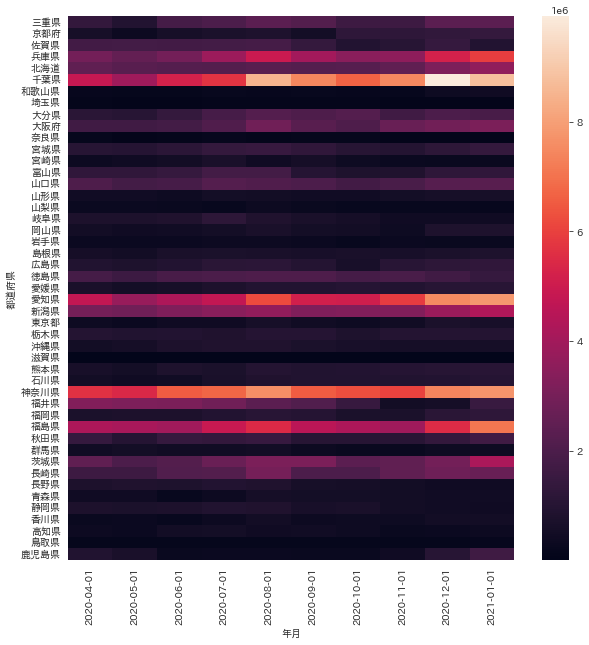

In [157]:
# Heatmap で描画
plt.figure(figsize=(10, 10))
sns.heatmap(viz_data)